## IMPORTING LIBRARIES  

In [1]:
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, silhouette_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
### Algorithams
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
## visualzations and summary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from skimpy import skim
warnings.filterwarnings('ignore')

# Data collection

In [2]:
# Load the dataset
file_path = r'dataset.csv'
data = pd.read_csv(file_path)

In [3]:
#display the first 5 rows
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#display the last 5 rows
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## Finding the summary of the data

In [5]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ Dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 6362620 │ │ float64     │ 5     │                                                         │
│ │ Number of columns │ 11      │ │ int32       │ 3     │                                                         │
│ └───────────────────┴─────────┘ │ string      │ 3     │                                                         │
│                                 └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %  ┃ mean       ┃ sd       ┃ p0 ┃ p25   ┃ p50    ┃ p75     ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ step            │   0 │     0 │      243.4 │    142.3 │  1 │   156 │    239 │     335 │       743 │ ▅▇▇▃▁  │  │
│ │ amount          │   0 │     0 │     179900 │   603900 │  0 │ 13390 │  74870 │  208700 │  92450000 │   ▇    │  │
│ │ oldbalanceOrg   │   0 │     0 │     833900 │  2888000 │  0 │     0 │  14210 │  107300 │  59590000 │   ▇    │  │
│ │ newbalanceOrig  │   0 │     0 │     855100 │  2924000 │  0 │     0 │      0 │  144300 │  49590000 │   ▇    │  │
│ │ oldbalanceDest  │   0 │     0 │    1101000 │  3399000 │  0 │     0 │ 132700 │  943000 │ 356000000 │   ▇    │  │
│ │ newbalanceDest  │   0 │     0 │    1225000 │  3674000 │  0 │     0 │ 214700 │ 1112000 │ 356200000 │   ▇    │  │
│ │ isFraud         │   0 │     0 │   0.001291 │   0.0359 │  0 │     0 │      0 │       0 │         1 │   ▇    │  │
│ │ isFlaggedFraud  │   0 │     0 │  2.515e-06 │ 0.001586 │  0 │     0 │      0 │       0 │         1 │   ▇    │  │
│ └─────────────────┴─────┴───────┴────────────┴──────────┴────┴───────┴────────┴─────────┴───────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃          ┃    ┃      ┃          ┃            ┃           ┃            ┃ chars per ┃ words per  ┃ total     ┃  │
│ ┃ column   ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max        ┃ row       ┃ row        ┃ words     ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ type     │  0 │    0 │ DEBIT    │ TRANSFER   │ CASH_IN   │ TRANSFER   │      7.42 │          1 │   6362620 │  │
│ │ nameOrig │  0 │    0 │ C6626    │ C123100681 │ C10000006 │ C999999784 │      10.5 │          1 │   6362620 │  │
│ │          │    │      │          │ 5          │ 39        │            │           │            │           │  │
│ │ nameDest │  0 │    0 │ C2       │ M197978715 │ C10000040 │ M999999784 │      10.5 │          1 │   6362620 │  │
│ │          │    │      │          │ 5          │ 82        │            │           │            │           │  │
│ └──────────┴────┴──────┴──────────┴────────────┴───────────┴────────────┴───────────┴────────────┴───────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# **Exploratory Data Analysis (EDA)**

In [6]:
# data's row, column counts
data.shape

(6362620, 11)

6362620 and 11 column are there.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [9]:
# # plot the line plot to show the missing values
# plt.figure(figsize=(20,5))
# sns.heatmap( data.isnull(),yticklabels=False,cbar=True,cmap='viridis')
# plt.gcf().set_facecolor('purple')
# plt.show()

<Axes: >

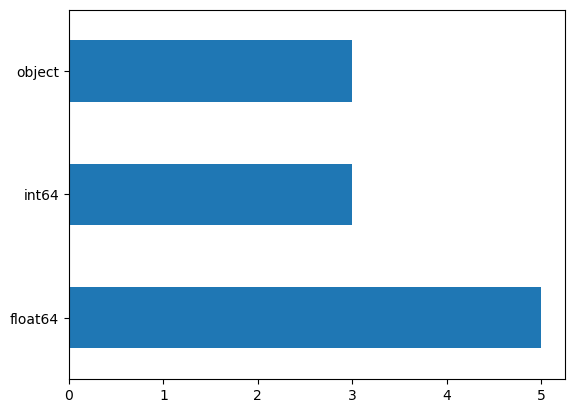

In [10]:
data.dtypes.value_counts().plot(kind='barh')

# Data Pre-processing

In [11]:
# checking the datatypes of the columns
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [12]:
# Drop rows with missing values (if any)
data = data.dropna()

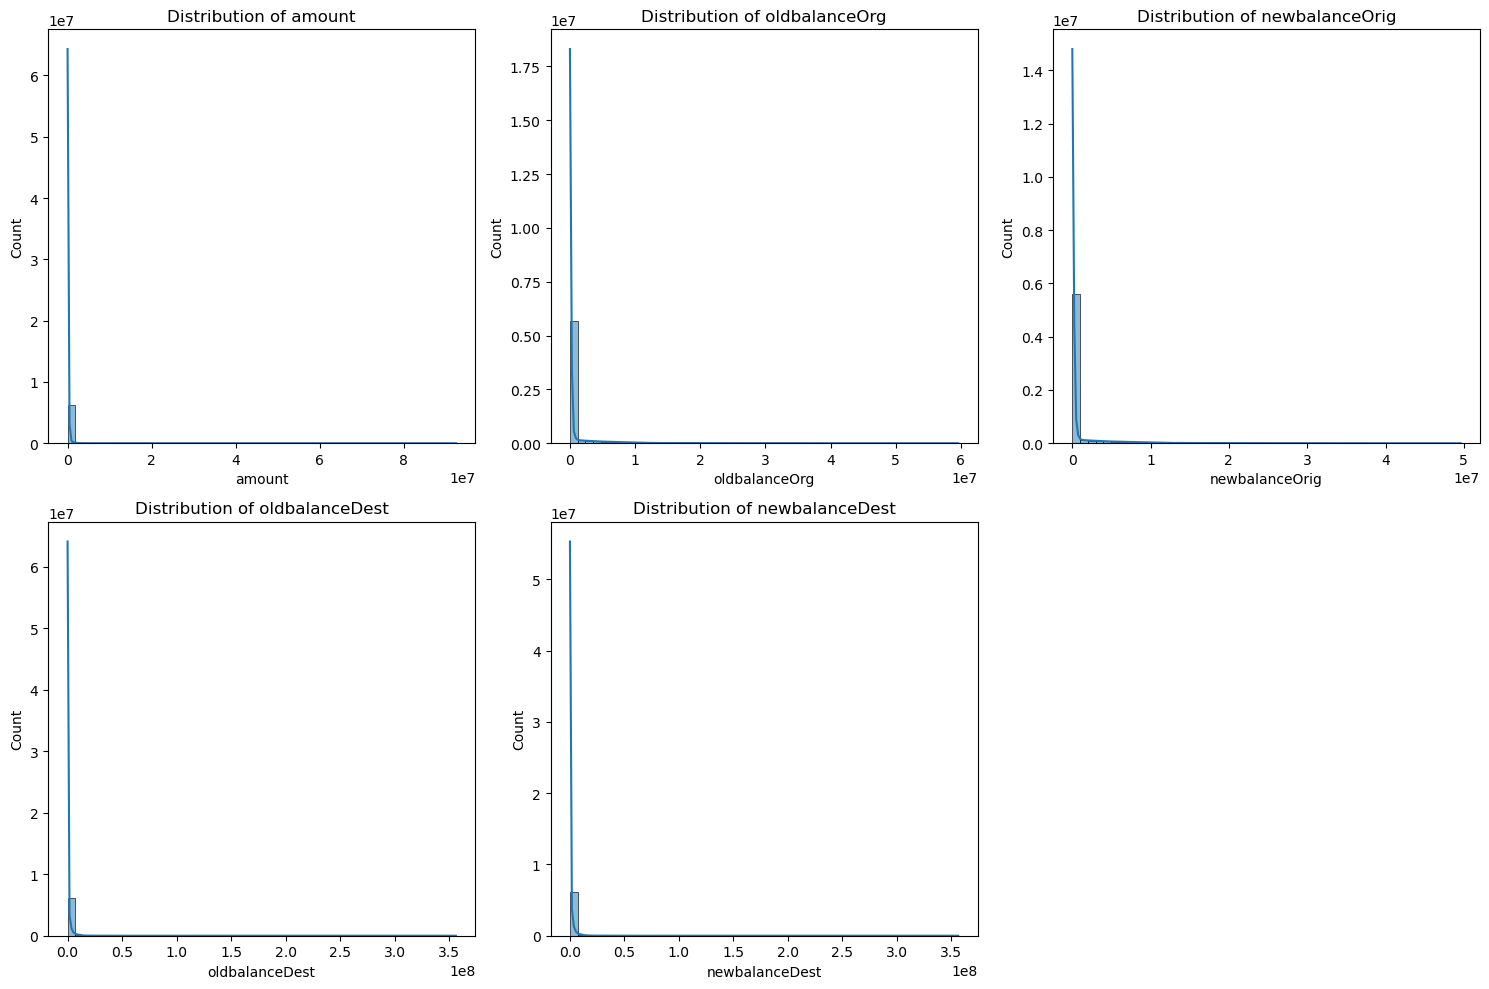

In [13]:
# Plot distributions of numerical features
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Transaction Type')

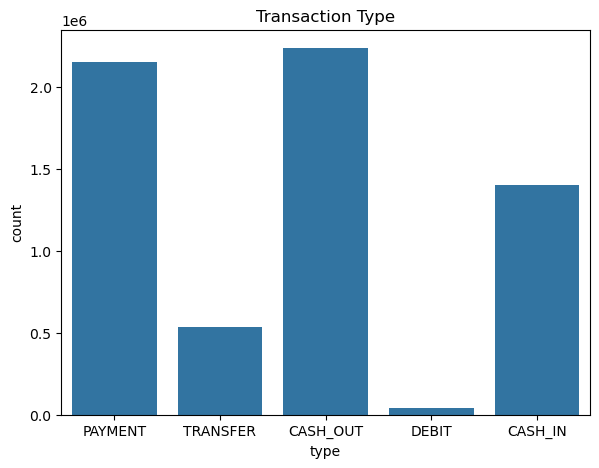

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of categorical features
plt.figure(figsize=(15, 5))

# Transaction type
plt.subplot(1, 2, 1)
sns.countplot(x='type', data=data)
plt.title('Transaction Type')

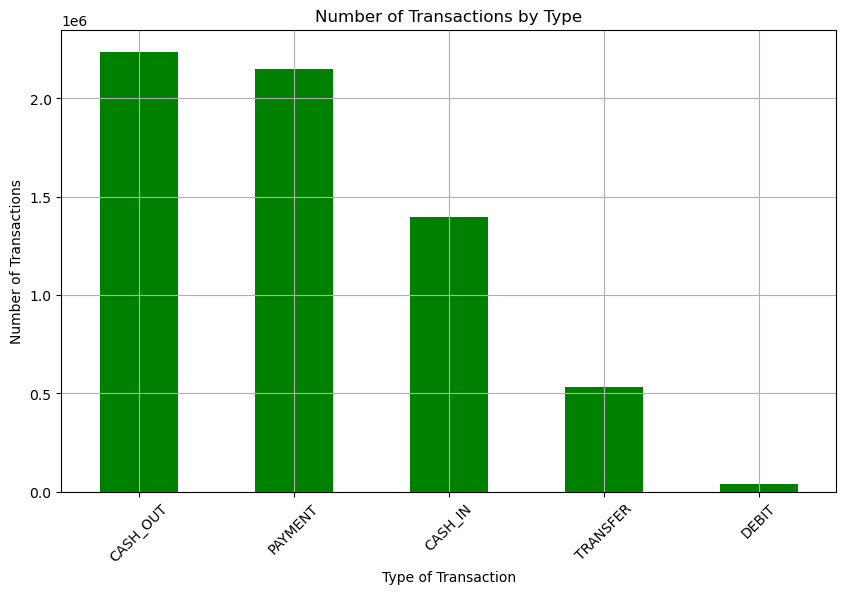

In [15]:

# Counting the occurrence of each transaction type
transaction_types = data['type'].value_counts()

plt.figure(figsize=(10, 6))
transaction_types.plot(kind='bar', color='green')
plt.title('Number of Transactions by Type')
plt.xlabel('Type of Transaction')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


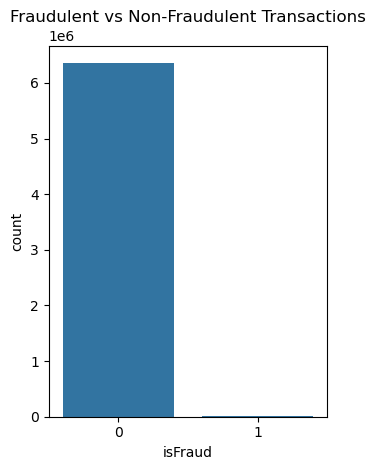

In [16]:
# Fraudulent vs Non-Fraudulent Transactions
plt.subplot(1, 2, 2)
sns.countplot(x='isFraud', data=data)
plt.title('Fraudulent vs Non-Fraudulent Transactions')

plt.tight_layout()
plt.show()

**isFraud is the target column. In here, 0 refers Non Fraudulent Transaction and 1 refers Fraudulent Transaction. This graph shows the value counts for Fraudulent and Non-Fraudulent Transactions. from this graph, we can know data is imbalanced here. so we need to balance the data.**

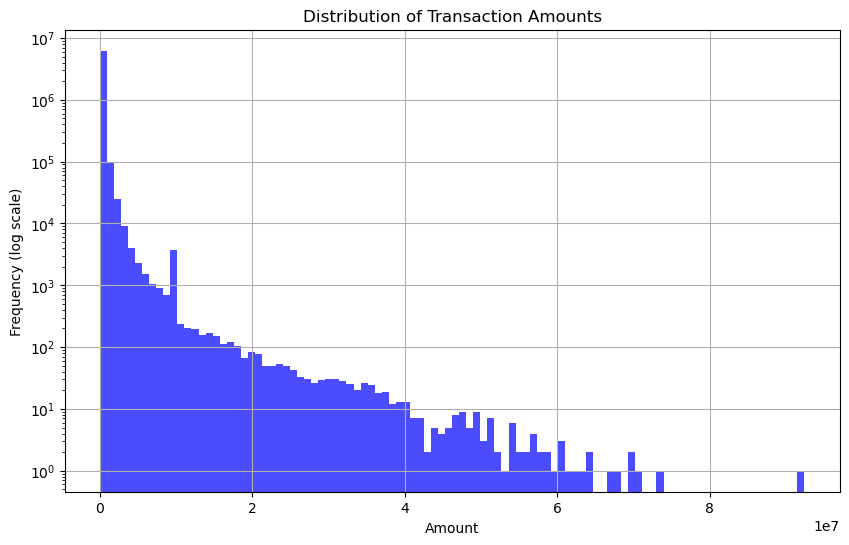

In [17]:
# Assuming your DataFrame is named df
plt.figure(figsize=(10, 6))
plt.hist(data['amount'], bins=100, color='blue', alpha=0.7)
plt.yscale('log')  
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency (log scale)')
plt.grid(True)
plt.show()


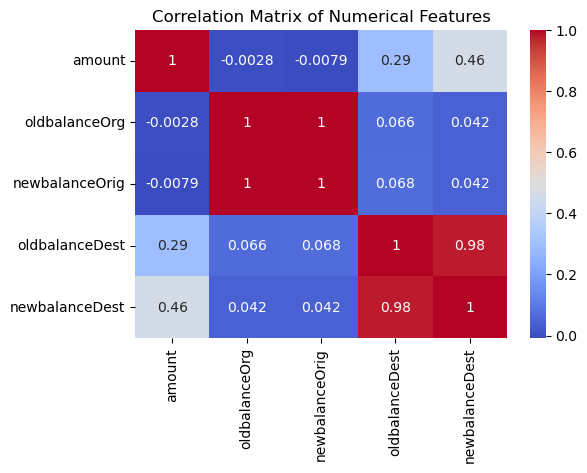

In [18]:
# Correlation matrix
plt.figure(figsize=(6, 4))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

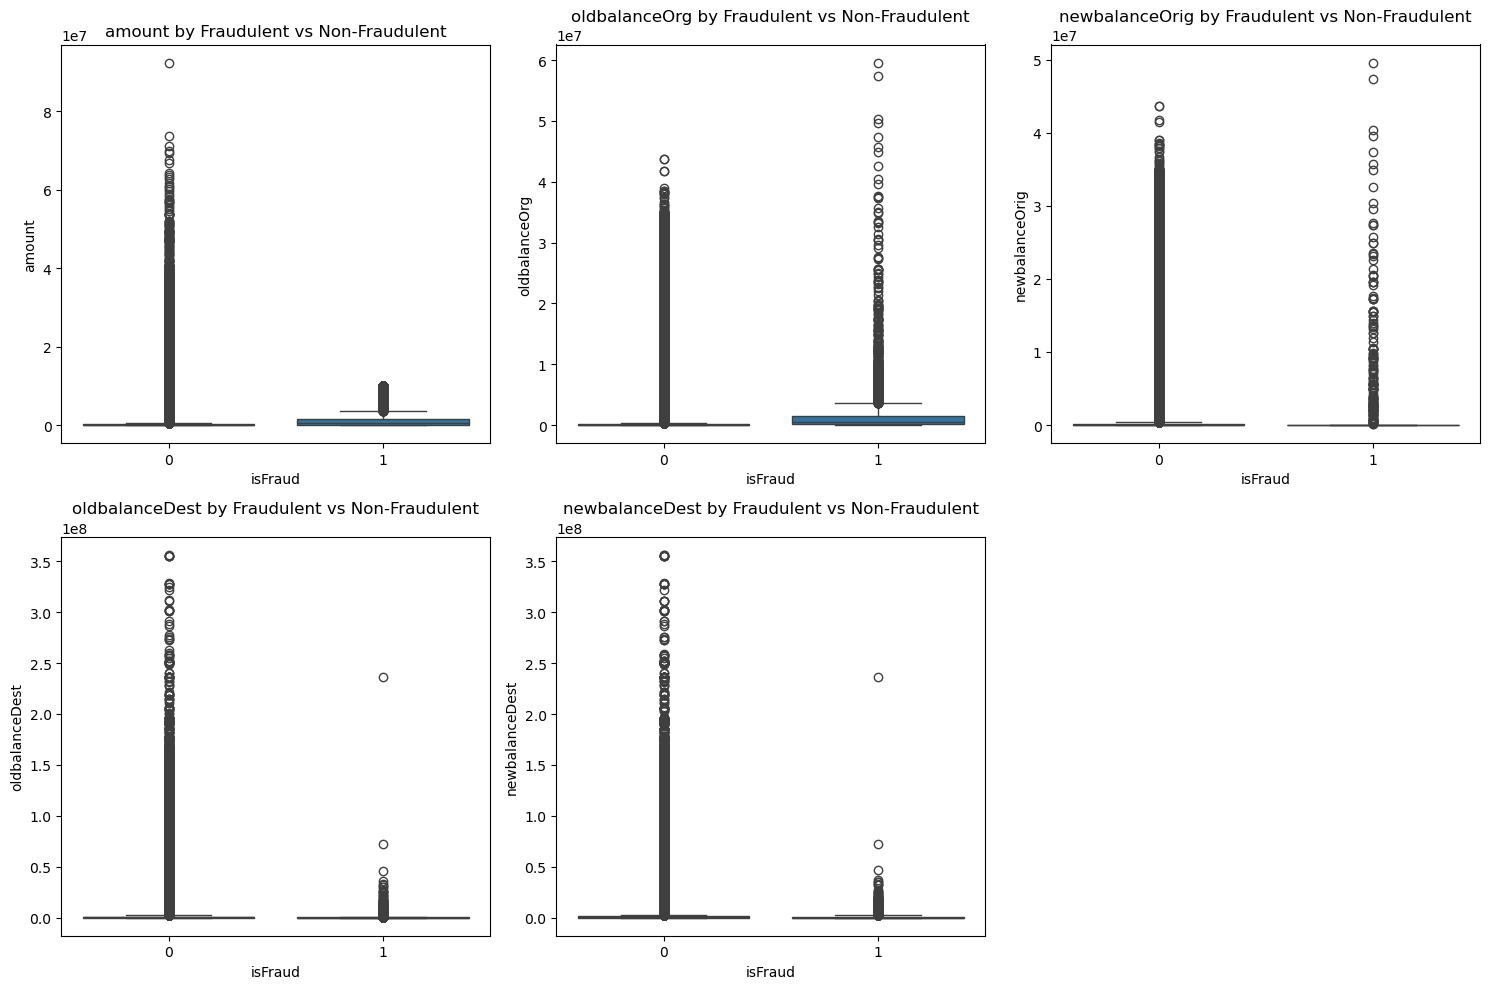

In [19]:
# Boxplots for numerical features with respect to isFraud
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='isFraud', y=feature, data=data)
    plt.title(f'{feature} by Fraudulent vs Non-Fraudulent')

plt.tight_layout()
plt.show()

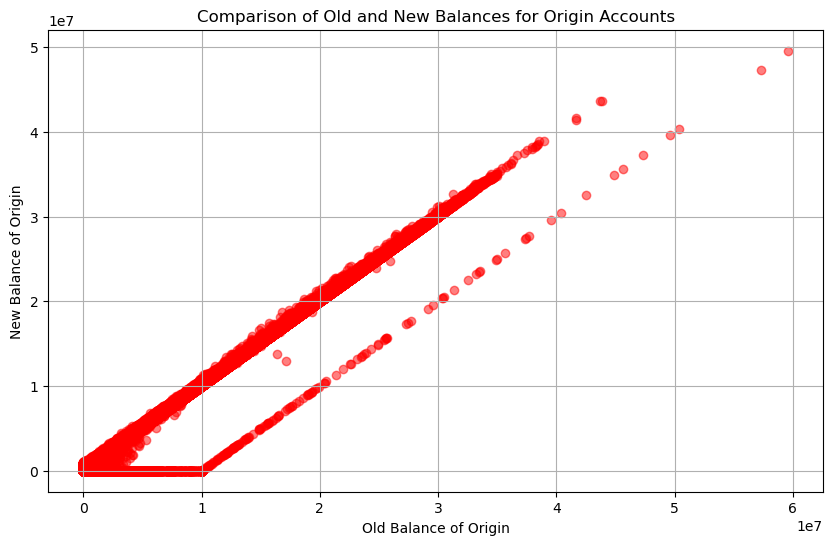

In [20]:

plt.figure(figsize=(10, 6))
plt.scatter(data['oldbalanceOrg'], data['newbalanceOrig'], alpha=0.5, color='red')
plt.title('Comparison of Old and New Balances for Origin Accounts')
plt.xlabel('Old Balance of Origin')
plt.ylabel('New Balance of Origin')
plt.grid(True)
plt.show()


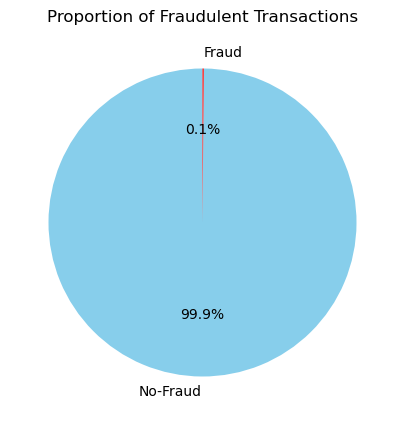

In [21]:
# Counting fraud and non-fraud transactions
fraud_counts = data['isFraud'].value_counts()

plt.figure(figsize=(5, 5))
fraud_counts.plot(kind='pie', labels=['No-Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
plt.title('Proportion of Fraudulent Transactions')
plt.ylabel('')  # Hide the y-label as it's not needed for pie charts
plt.show()


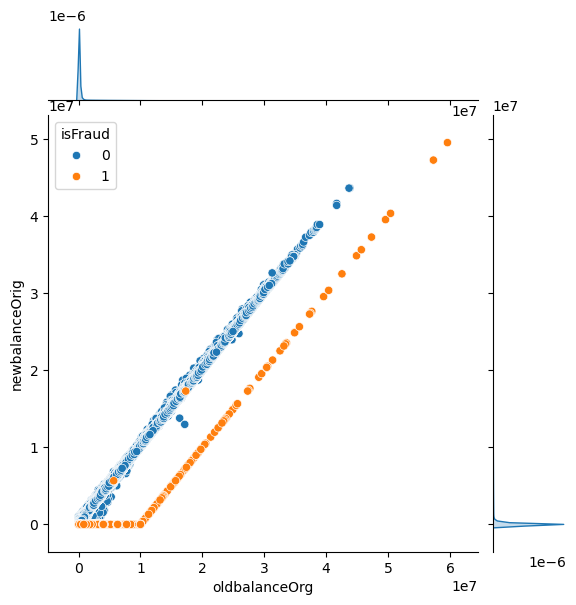

In [22]:
sns.jointplot(data=data, x="oldbalanceOrg", y="newbalanceOrig", hue="isFraud")

**The graph is a joint plot showing the relationship between old balance and new balance for origin accounts, color-coded by fraud status. Fraudulent transactions (orange) diverge from non-fraudulent ones (blue).**

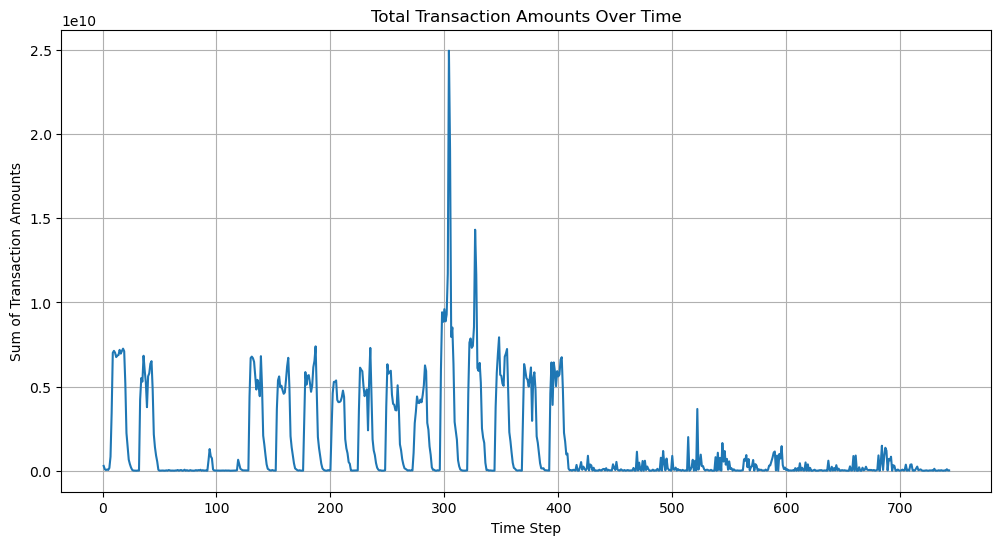

In [23]:
plt.figure(figsize=(12, 6))
data.groupby('step')['amount'].sum().plot()
plt.title('Total Transaction Amounts Over Time')
plt.xlabel('Time Step')
plt.ylabel('Sum of Transaction Amounts')
plt.grid(True)
plt.show()


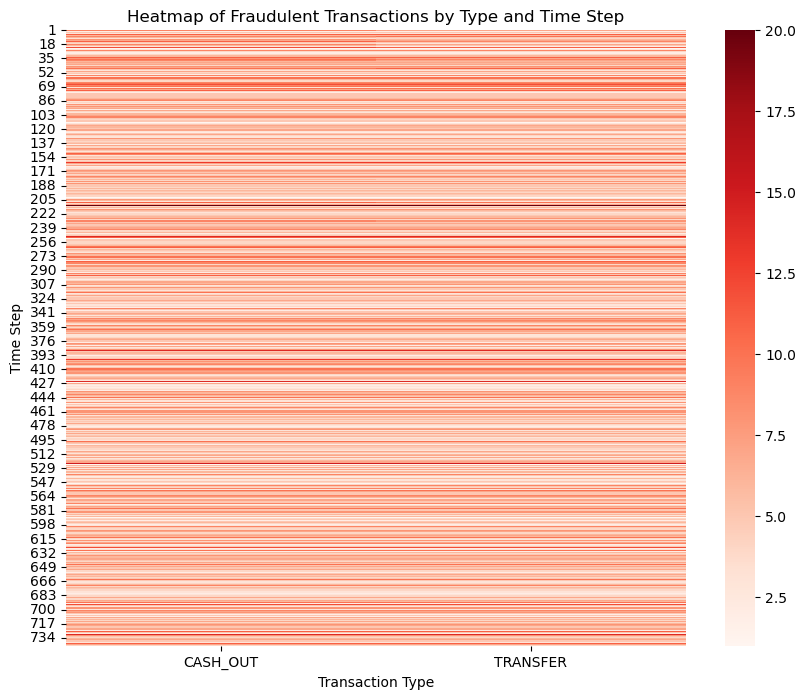

In [24]:
# Creating a pivot table with counts of fraud transactions per type and step
fraud_data = data[data['isFraud'] == 1]
pivot_table = pd.pivot_table(fraud_data, values='isFraud', index='step', columns='type', aggfunc='count', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=False, cmap='Reds')
plt.title('Heatmap of Fraudulent Transactions by Type and Time Step')
plt.xlabel('Transaction Type')
plt.ylabel('Time Step')
plt.show()


**The heatmap illustrates fraudulent transactions by type (CASH_OUT and TRANSFER) over time. Darker shades indicate higher transaction amounts. The color intensity shows variation in fraudulent activity across different time steps.**

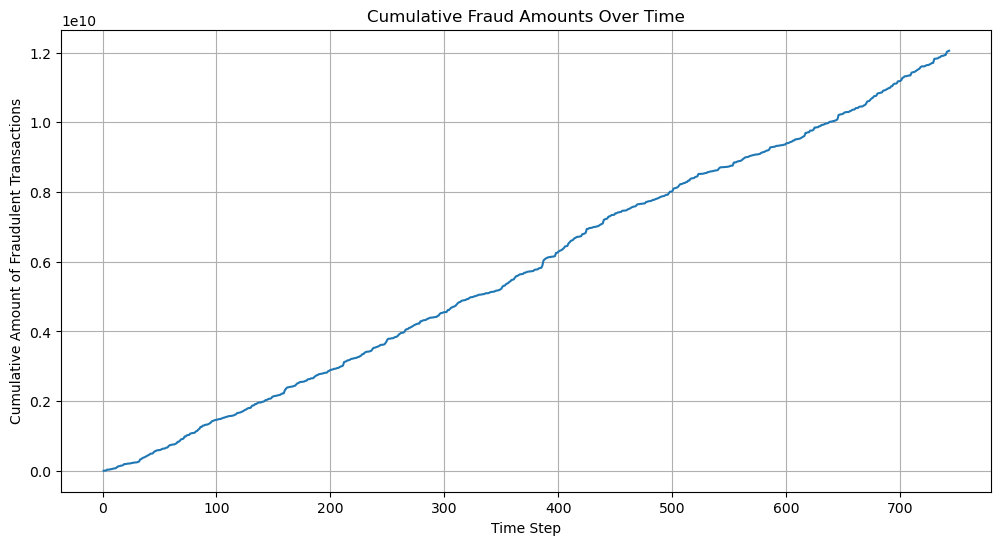

In [25]:

# Creating a cumulative sum of amounts only for fraud cases
fraud_amounts_cumulative = data[data['isFraud'] == 1].groupby('step')['amount'].sum().cumsum()

plt.figure(figsize=(12, 6))
fraud_amounts_cumulative.plot()
plt.title('Cumulative Fraud Amounts Over Time')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Amount of Fraudulent Transactions')
plt.grid(True)
plt.show()


***This graph shows the cumulative amount of fraudulent transactions over time, with the x-axis representing the time steps and the y-axis representing the cumulative fraudulent transaction amount, indicating a steady upward trend.***

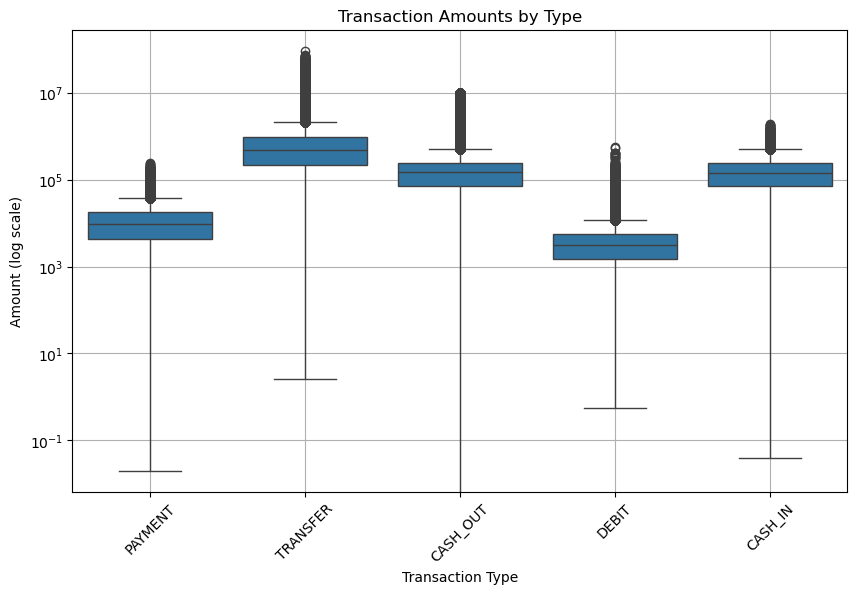

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=data)
plt.yscale('log')  # Using a log scale due to wide distribution of amounts
plt.title('Transaction Amounts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount (log scale)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [27]:
# sns.pairplot(data)

**The image displays a pairplot, a grid of scatter plots showing the relationships between multiple numerical variables. It also includes histograms on the diagonal, showing each variable’s distribution.**

<Axes: ylabel='count'>

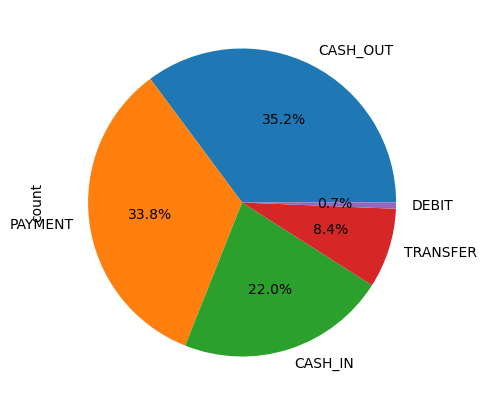

In [28]:
# plot the pie plot for the
plt.figure(figsize=(10,5))
data['type'].value_counts().plot.pie(autopct='%1.1f%%')

### For balance the data we will implement Undersampling method

#### Undersampling

In [29]:
# Separate the majority and minority classes
data_majority = data[data.isFraud == 0]
data_minority = data[data.isFraud == 1]

In [30]:
# Undersample the majority class
data_majority_undersampled = resample(data_majority, 
                                      replace=False,     # sample without replacement
                                      n_samples=len(data_minority),    # to match minority class
                                      random_state=42)   # reproducible results

# Combine the undersampled majority class with the minority class
data_undersampled = pd.concat([data_majority_undersampled, data_minority])

In [31]:
# Value counts for target column
data_undersampled["isFraud"].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

In [32]:
data_undersampled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1777056,162,CASH_OUT,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0
1350600,137,PAYMENT,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0
1991933,179,PAYMENT,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0
5092368,355,PAYMENT,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0
5066515,354,CASH_IN,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


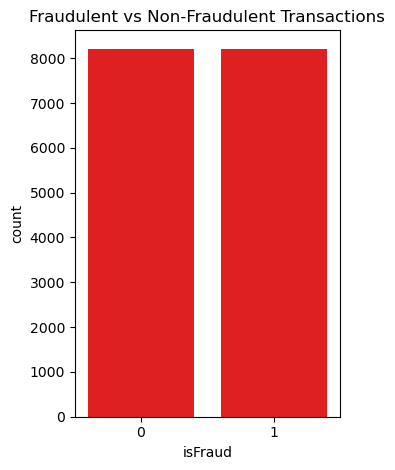

In [33]:
# Fraudulent vs Non-Fraudulent Transactions
plt.subplot(1, 2, 2)
sns.countplot(x='isFraud', data=data_undersampled,color='red')
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.tight_layout()
plt.show()

Now we have balanced data (data_undersampled)

In [34]:
# row, colun counts for undersampled data
data_undersampled.shape

(16426, 11)

In [35]:
# read the data_undersampled
data_undersampled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1777056,162,CASH_OUT,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0
1350600,137,PAYMENT,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0
1991933,179,PAYMENT,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0
5092368,355,PAYMENT,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0
5066515,354,CASH_IN,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [36]:
# drop unneccessary columns from data_undersampled
data_undersampled = data_undersampled.drop(columns=["step", "nameOrig", "nameDest", "isFlaggedFraud"])

In [37]:
# retrive first 5 rows
data_undersampled.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1777056,CASH_OUT,183806.32,19391.00,0.00,382572.19,566378.51,0
1350600,PAYMENT,521.37,0.00,0.00,0.00,0.00,0
1991933,PAYMENT,3478.18,19853.00,16374.82,0.00,0.00,0
5092368,PAYMENT,1716.05,5769.17,4053.13,0.00,0.00,0
5066515,CASH_IN,253129.93,1328499.49,1581629.42,2713220.48,2460090.55,0


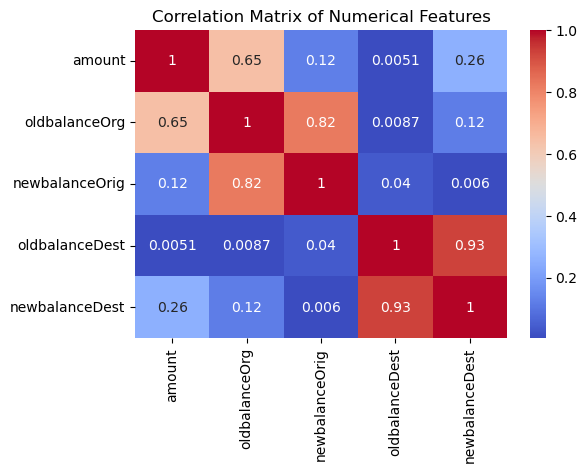

In [38]:
# Correlation matrix
plt.figure(figsize=(6, 4))
correlation_matrix = data_undersampled[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

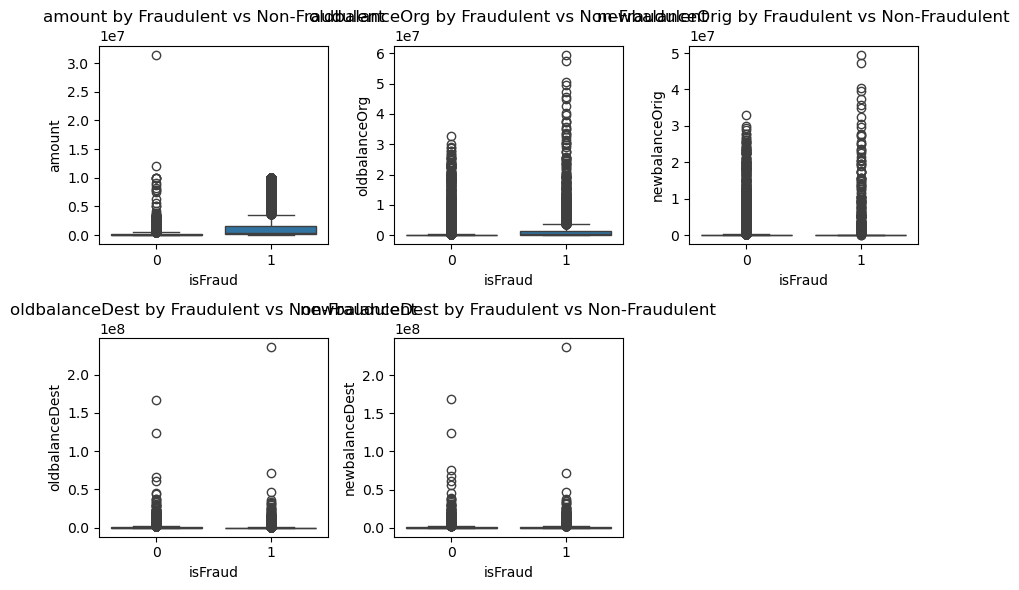

In [39]:
# Boxplots for numerical features with respect to isFraud
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
plt.figure(figsize=(9, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='isFraud', y=feature, data=data_undersampled)
    plt.title(f'{feature} by Fraudulent vs Non-Fraudulent')

plt.tight_layout()
plt.show()

In [40]:
# information about data_undersampled
data_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 1777056 to 6362619
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            16426 non-null  object 
 1   amount          16426 non-null  float64
 2   oldbalanceOrg   16426 non-null  float64
 3   newbalanceOrig  16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   newbalanceDest  16426 non-null  float64
 6   isFraud         16426 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.0+ MB


We can't pass object type directly into our model. So we need to convert that object type into numerical type. for that we can LabelEncoder. It will make group every categories and give a label for each category.

In [41]:
# value counts for type column (object column)
data_undersampled["type"].value_counts()

type
CASH_OUT    7066
TRANSFER    4750
PAYMENT     2735
CASH_IN     1825
DEBIT         50
Name: count, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

# initialize labelencoder
le=LabelEncoder()

# Convert object type into integer type
data_undersampled["type"]=le.fit_transform(data_undersampled["type"])

In [43]:
data_undersampled["type"].value_counts()

type
1    7066
4    4750
3    2735
0    1825
2      50
Name: count, dtype: int64

Category = Label 


CASH_IN = 0 <br>
CASH_OUT = 1 <br>
DEBIT = 2 <br>
PAYMENT = 3 <br>
TRANSFER = 4 <br>




In [44]:
# Split the data into features and target
X_undersampled = data_undersampled[["type","amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]]
y_undersampled = data_undersampled["isFraud"]

In [45]:
print(X_undersampled)
print("===============================")
print(y_undersampled)

         type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1777056     1   183806.32       19391.00            0.00       382572.19   
1350600     3      521.37           0.00            0.00            0.00   
1991933     3     3478.18       19853.00        16374.82            0.00   
5092368     3     1716.05        5769.17         4053.13            0.00   
5066515     0   253129.93     1328499.49      1581629.42      2713220.48   
...       ...         ...            ...             ...             ...   
6362615     1   339682.13      339682.13            0.00            0.00   
6362616     4  6311409.28     6311409.28            0.00            0.00   
6362617     1  6311409.28     6311409.28            0.00        68488.84   
6362618     4   850002.52      850002.52            0.00            0.00   
6362619     1   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  
1777056       566378.51  
1350600            0.00  
1991933  

In [46]:
# # Normalize the features
# scaler=StandardScaler()
# X_undersampled = scaler.fit_transform(X_undersampled)

In [47]:
# # Load the scaler
# import joblib
# scaler = joblib.dump(scaler,"scaler.pkl")


**Normalizing brings all features to a similar scale, ensuring that no single feature dominates due to its scale. It will improve model performance**

# Data splitting

In [48]:
# Split the data into training and testing sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)

In [49]:
X_test_under

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
6055134,4,766151.45,766151.45,0.00,0.00,0.00
5188022,4,31315.51,31315.51,0.00,0.00,0.00
4129254,3,19043.02,70067.00,51023.98,0.00,0.00
5555890,3,11162.03,102921.00,91758.97,0.00,0.00
5046728,1,268851.80,220431.00,0.00,1641753.59,1910605.40
...,...,...,...,...,...,...
6131928,4,57204.07,57204.07,0.00,0.00,0.00
3764520,1,184433.86,94883.00,0.00,0.00,184433.86
1930347,4,978261.98,978261.98,0.00,0.00,0.00
1932205,4,8594499.99,8594499.99,0.00,0.00,0.00


In [50]:
print("X shape",X_train_under.shape , X_test_under.shape)
print("y shape",y_train_under.shape , y_test_under.shape)

X shape (11498, 6) (4928, 6)
y shape (11498,) (4928,)


#

# Algorithm Implementation

#### Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_under, y_train_under)

# Predict on the test data
y_pred_dt = dt.predict(X_test_under)

# Evaluate the model
dt_accuracy = accuracy_score(y_test_under, y_pred_dt)
dt_precision_score = precision_score(y_test_under, y_pred_dt)
dt_f1_score = f1_score(y_test_under, y_pred_dt)
dt_recall_score = recall_score(y_test_under, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_test_under, y_pred_dt)
dt_class_report = classification_report(y_test_under, y_pred_dt)


print(f'Accuracy for Decision Tree : {dt_accuracy}')
print('='*60)
print(f'precision_score for Decision Tree : {dt_precision_score}')
print('='*60)
print(f'f1_score Report for Decision Tree:{dt_f1_score}')
print('='*60)
print(f'recall_score Report for Decision Tree:{dt_recall_score}')
print('='*60)
print(f'confusion_matrix for Decision Tree:\n{dt_conf_matrix}')
print('='*60)
print(f'Classification Report for Decision Tree:\n{dt_class_report}')



Accuracy for Decision Tree : 0.9908685064935064
precision_score for Decision Tree : 0.9870340356564019
f1_score Report for Decision Tree:0.9908480780964003
recall_score Report for Decision Tree:0.9946917109024092
confusion_matrix for Decision Tree:
[[2447   32]
 [  13 2436]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2479
           1       0.99      0.99      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



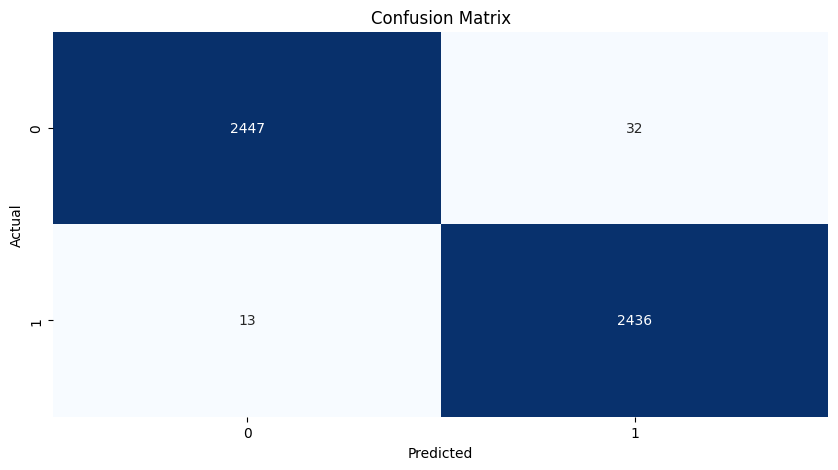

In [53]:
# Plot confusion matrix
dt_cm = confusion_matrix(y_test_under, y_pred_dt)
plt.figure(figsize=(10,5))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_under, y_train_under)

# Predict on the test data
y_pred_dt = dt.predict(X_train_under)

# Evaluate the model
dt_accuracy = accuracy_score(y_train_under, y_pred_dt)
dt_precision_score = precision_score(y_train_under, y_pred_dt)
dt_f1_score = f1_score(y_train_under, y_pred_dt)
dt_recall_score = recall_score(y_train_under, y_pred_dt)
dt_conf_matrix = confusion_matrix(y_train_under, y_pred_dt)
dt_class_report = classification_report(y_train_under, y_pred_dt)


print(f'Accuracy for Decision Tree : {dt_accuracy}')
print('='*60)
print(f'precision_score for Decision Tree : {dt_precision_score}')
print('='*60)
print(f'f1_score Report for Decision Tree:{dt_f1_score}')
print('='*60)
print(f'recall_score Report for Decision Tree:{dt_recall_score}')
print('='*60)
print(f'confusion_matrix for Decision Tree:\n{dt_conf_matrix}')
print('='*60)
print(f'Classification Report for Decision Tree:\n{dt_class_report}')



Accuracy for Decision Tree : 1.0
precision_score for Decision Tree : 1.0
f1_score Report for Decision Tree:1.0
recall_score Report for Decision Tree:1.0
confusion_matrix for Decision Tree:
[[5734    0]
 [   0 5764]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5734
           1       1.00      1.00      1.00      5764

    accuracy                           1.00     11498
   macro avg       1.00      1.00      1.00     11498
weighted avg       1.00      1.00      1.00     11498



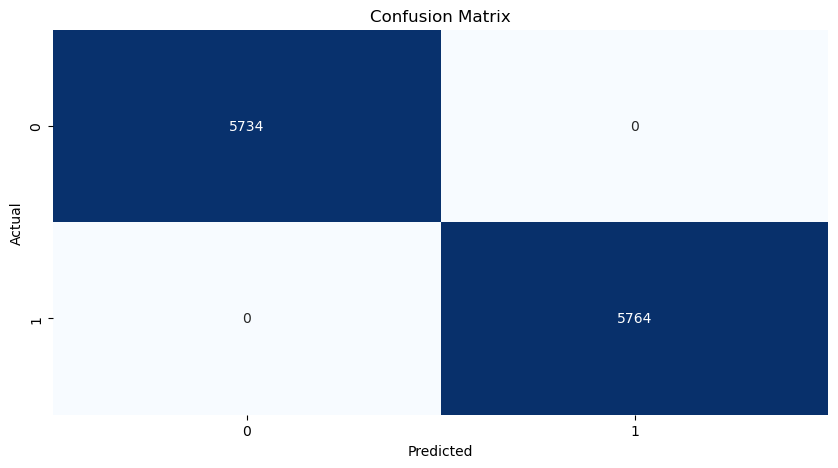

In [53]:
# # Plot confusion matrix
# dt_cm = confusion_matrix(y_test_under, y_pred_dt)
plt.figure(figsize=(10,5))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
import shap
import numpy as np
shap.initjs()

# Reduce dataset size to 5%
X_train_sample = X_train_under.sample(frac=0.05, random_state=42)
X_test_sample = X_test_under.sample(frac=0.05, random_state=42)


explainer = shap.KernelExplainer(dt.predict, X_train_sample)

# Calculate SHAP values for the reduced testing data
shap_values = explainer.shap_values(X_test_sample)

# Plot the SHAP summary plot (for an overview of feature importances)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

ModuleNotFoundError: No module named 'shap'

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test_sample.iloc[0])


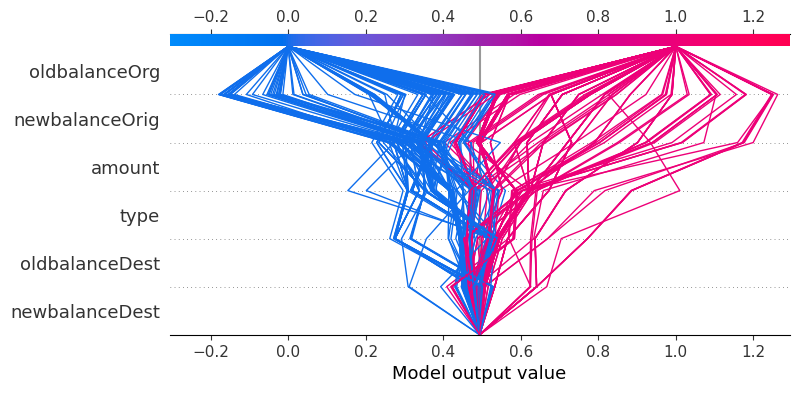

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values, X_test_under.columns, ignore_warnings=True)

#### Random Forest Classifier

In [56]:
# Random Forest with Hyperparameter Tuning

rf_clf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf_clf = GridSearchCV(rf_clf, param_grid_rf, cv=3, scoring='accuracy')
grid_rf_clf.fit(X_train_under, y_train_under)
y_pred_rf = grid_rf_clf.predict(X_test_under)

print("Best parameters for Random Forest:", grid_rf_clf.best_params_)
print("Random Forest Performance with Hyperparameter Tuning:")

print('='*70)
#accuracy score
rf_acc = accuracy_score(y_test_under,y_pred_rf)
print("Accuracy Score of RandomForest= ",rf_acc)
print('='*70)
#finding the f1 score
rf_f1 = f1_score(y_test_under,y_pred_rf)
print("f1 score score fo RandomForest =",rf_f1)
print('='*70)
rf_pre = precision_score(y_test_under,y_pred_rf)
print('precision_score of RandomForest is=',rf_pre)
print('='*70)
#recall_score
rf_rec = recall_score(y_test_under,y_pred_rf)
print('recall_score of RandomForest is =',rf_rec)
print('='*70)
#confusion matrix
rf_cm = confusion_matrix(y_test_under,y_pred_rf) 
print('coonfusion matrxi of RandomForest =\n',rf_cm)
print('='*70)
rf_cr = classification_report(y_test_under,y_pred_rf) 
print('cclassification_report of RandomForest =\n',rf_cr)
print('='*70)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Performance with Hyperparameter Tuning:
Accuracy Score of RandomForest=  0.992086038961039
f1 score score fo RandomForest = 0.9920812182741117
precision_score of RandomForest is= 0.9866720516962844
recall_score of RandomForest is = 0.9975500204164965
coonfusion matrxi of RandomForest =
 [[2446   33]
 [   6 2443]]
cclassification_report of RandomForest =
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



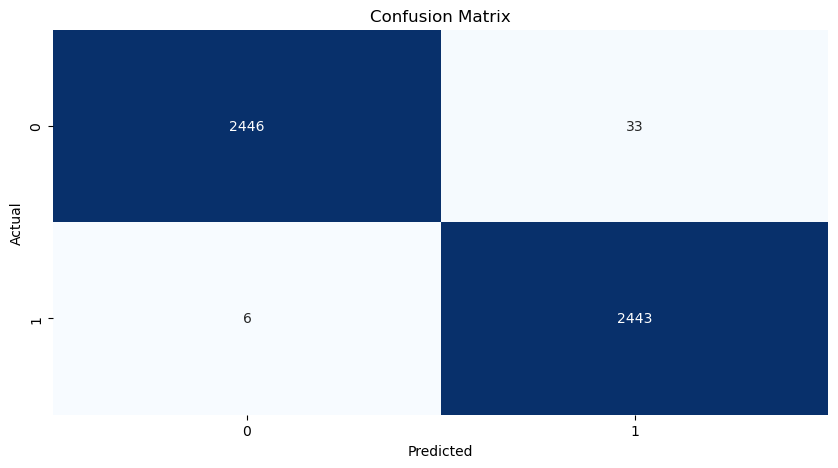

In [57]:
# Plot confusion matrix
rf_cm = confusion_matrix(y_test_under, y_pred_rf)
plt.figure(figsize=(10,5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# Random Forest with Hyperparameter Tuning

rf_clf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf_clf = GridSearchCV(rf_clf, param_grid_rf, cv=3, scoring='accuracy')
grid_rf_clf.fit(X_train_under, y_train_under)
y_pred_rf = grid_rf_clf.predict(X_train_under)

print("Best parameters for Random Forest:", grid_rf_clf.best_params_)
print("Random Forest Performance with Hyperparameter Tuning:")

print('='*70)
#accuracy score
rf_acc = accuracy_score(y_train_under,y_pred_rf)
print("Accuracy Score of RandomForest= ",rf_acc)
print('='*70)
#finding the f1 score
rf_f1 = f1_score(y_train_under,y_pred_rf)
print("f1 score score fo RandomForest =",rf_f1)
print('='*70)
rf_pre = precision_score(y_train_under,y_pred_rf)
print('precision_score of RandomForest is=',rf_pre)
print('='*70)
#recall_score
rf_rec = recall_score(y_train_under,y_pred_rf)
print('recall_score of RandomForest is =',rf_rec)
print('='*70)
#confusion matrix
rf_cm = confusion_matrix(y_train_under,y_pred_rf) 
print('coonfusion matrxi of RandomForest =\n',rf_cm)
print('='*70)
rf_cr = classification_report(y_train_under,y_pred_rf) 
print('cclassification_report of RandomForest =\n',rf_cr)
print('='*70)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Performance with Hyperparameter Tuning:
Accuracy Score of RandomForest=  1.0
f1 score score fo RandomForest = 1.0
precision_score of RandomForest is= 1.0
recall_score of RandomForest is = 1.0
coonfusion matrxi of RandomForest =
 [[5734    0]
 [   0 5764]]
cclassification_report of RandomForest =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5734
           1       1.00      1.00      1.00      5764

    accuracy                           1.00     11498
   macro avg       1.00      1.00      1.00     11498
weighted avg       1.00      1.00      1.00     11498



Using 575 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/246 [00:00<?, ?it/s]

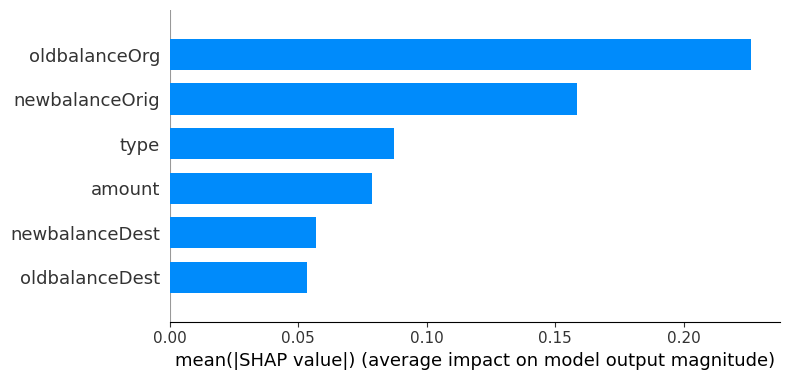

In [66]:
import shap
import numpy as np
shap.initjs()

# Reduce dataset size to 5%
X_train_sample = X_train_under.sample(frac=0.05, random_state=42)
X_test_sample = X_test_under.sample(frac=0.05, random_state=42)


explainer = shap.KernelExplainer(grid_rf_clf.predict, X_train_sample)

# Calculate SHAP values for the reduced testing data
shap_values = explainer.shap_values(X_test_sample)

# Plot the SHAP summary plot (for an overview of feature importances)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

In [67]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test_sample.iloc[0])


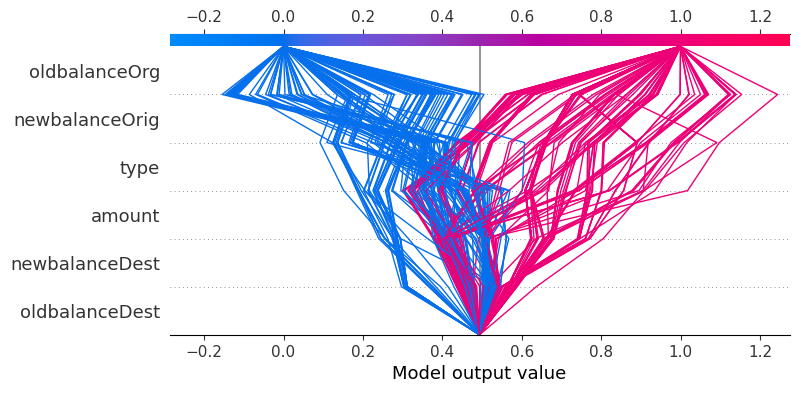

In [68]:
shap.decision_plot(explainer.expected_value, shap_values, X_test_under.columns, ignore_warnings=True)

### Gradient Boosting Machines

#### XGBClassifier

In [69]:
from xgboost import XGBClassifier

# Initializing the XGBoost Classifier
xgb = XGBClassifier()

# Fitting the model
xgb.fit(X_train_under, y_train_under)

# Prediction
xgb_pred = xgb.predict(X_test_under)

# Accuracy score
xgb_acc = accuracy_score(y_test_under, xgb_pred)
print("Accuracy Score of XGBoost Classifier = ", xgb_acc)
print('='*50)

# Finding the f1 score
xgb_f1 = f1_score(y_test_under, xgb_pred)
print("f1 score of XGBoost Classifier =", xgb_f1)
print('='*50)

# Precision score
xgb_pre = precision_score(y_test_under, xgb_pred)
print('Precision Score of XGBoost Classifier =', xgb_pre)
print('='*50)

# Recall score
xgb_rec = recall_score(y_test_under, xgb_pred)
print('Recall Score of XGBoost Classifier =', xgb_rec)
print('='*50)

# Confusion matrix
xgb_cm = confusion_matrix(y_test_under, xgb_pred)
print('Confusion Matrix of XGBoost Classifier =\n', xgb_cm)
print('='*50)

# Classification report
xgb_cr = classification_report(y_test_under, xgb_pred)
print('Classification Report of XGBoost Classifier =\n', xgb_cr)


Accuracy Score of XGBoost Classifier =  0.9924918831168831
f1 score of XGBoost Classifier = 0.9924781459646269
Precision Score of XGBoost Classifier = 0.9882591093117409
Recall Score of XGBoost Classifier = 0.9967333605553287
Confusion Matrix of XGBoost Classifier =
 [[2450   29]
 [   8 2441]]
Classification Report of XGBoost Classifier =
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2479
           1       0.99      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



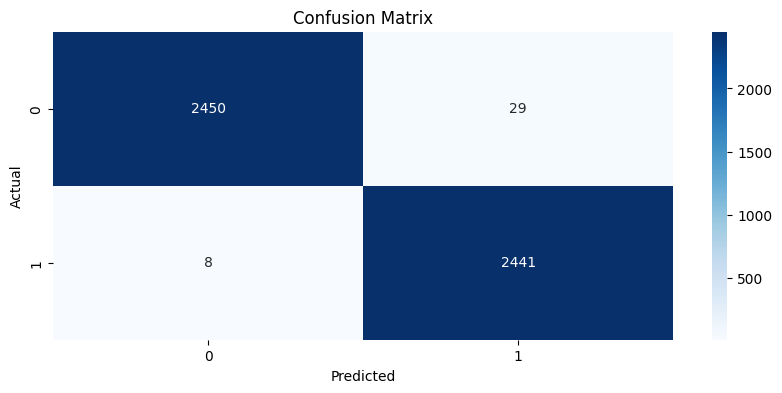

In [70]:
# Visualize the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
from xgboost import XGBClassifier

# Initializing the XGBoost Classifier
xgb = XGBClassifier()

# Fitting the model
xgb.fit(X_train_under, y_train_under)

# Prediction
xgb_pred = xgb.predict(X_train_under)

# Accuracy score
xgb_acc = accuracy_score(y_train_under, xgb_pred)
print("Accuracy Score of XGBoost Classifier = ", xgb_acc)
print('='*50)

# Finding the f1 score
xgb_f1 = f1_score(y_train_under, xgb_pred)
print("f1 score of XGBoost Classifier =", xgb_f1)
print('='*50)

# Precision score
xgb_pre = precision_score(y_train_under, xgb_pred)
print('Precision Score of XGBoost Classifier =', xgb_pre)
print('='*50)

# Recall score
xgb_rec = recall_score(y_train_under, xgb_pred)
print('Recall Score of XGBoost Classifier =', xgb_rec)
print('='*50)

# Confusion matrix
xgb_cm = confusion_matrix(y_train_under, xgb_pred)
print('Confusion Matrix of XGBoost Classifier =\n', xgb_cm)
print('='*50)

# Classification report
xgb_cr = classification_report(y_train_under, xgb_pred)
print('Classification Report of XGBoost Classifier =\n', xgb_cr)


Accuracy Score of XGBoost Classifier =  0.999478170116542
f1 score of XGBoost Classifier = 0.9994794377928162
Precision Score of XGBoost Classifier = 0.9996528982992017
Recall Score of XGBoost Classifier = 0.9993060374739764
Confusion Matrix of XGBoost Classifier =
 [[5732    2]
 [   4 5760]]
Classification Report of XGBoost Classifier =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5734
           1       1.00      1.00      1.00      5764

    accuracy                           1.00     11498
   macro avg       1.00      1.00      1.00     11498
weighted avg       1.00      1.00      1.00     11498



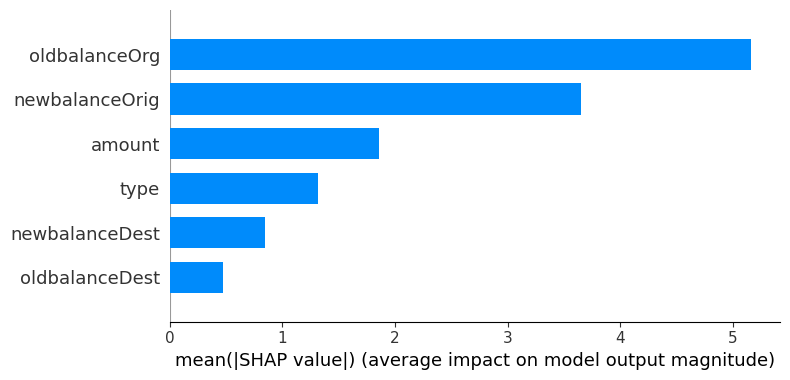

In [72]:
import shap
import numpy as np
shap.initjs()

# Reduce dataset size to 5%
X_train_sample = X_train_under.sample(frac=0.05, random_state=42)
X_test_sample = X_test_under.sample(frac=0.05, random_state=42)


explainer = shap.TreeExplainer(xgb, X_train_sample)
# Calculate SHAP values for the reduced testing data
shap_values = explainer.shap_values(X_test_sample)

# Plot the SHAP summary plot (for an overview of feature importances)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")


In [73]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test_sample.iloc[0])


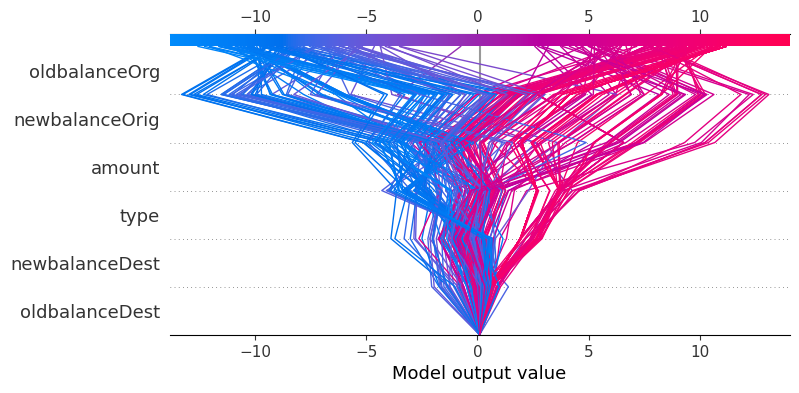

In [74]:
shap.decision_plot(explainer.expected_value, shap_values, X_test_under.columns, ignore_warnings=True)

#### GradientBoostingClassifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,classification_report
gb = GradientBoostingClassifier()
#fitting to the model
gb.fit(X_train_under,y_train_under)
#predicton
gb_pred = gb.predict(X_test_under)
#accuracy score 
gb_acc = accuracy_score(y_test_under,gb_pred)
print("Accuracy Score of GradientBoostingClassifier = ",gb_acc)
print('='*70)
#finding the f1 score
gb_f1 = f1_score(y_test_under,gb_pred)
print("f1 score score fo GradientBoostingClassifier =",gb_f1)
print('='*70)
#precision_score
gb_pre = precision_score(y_test_under,gb_pred)
print('precision_score of GradientBoostingClassifier is=',gb_pre)
print('='*70)
#recall_score
gb_rec = recall_score(y_test_under,gb_pred)
print('recall_score of GradientBoostingClassifier is =',gb_rec)
print('='*70)
#confusion matrix
gb_cm = confusion_matrix(y_test_under, gb_pred) 
print('coonfusion matrix of GradientBoostingClassifier =\n',gb_cm)
print('='*70)
## classification report 
gb_cr = classification_report(y_test_under, gb_pred)
print('classification_report of GradientBoostingClassifier =\n',gb_cr)


Accuracy Score of GradientBoostingClassifier =  0.9884334415584416
f1 score score fo GradientBoostingClassifier = 0.9884545270407129
precision_score of GradientBoostingClassifier is= 0.9807073954983923
recall_score of GradientBoostingClassifier is = 0.9963250306247448
coonfusion matrix of GradientBoostingClassifier =
 [[2431   48]
 [   9 2440]]
classification_report of GradientBoostingClassifier =
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      2479
           1       0.98      1.00      0.99      2449

    accuracy                           0.99      4928
   macro avg       0.99      0.99      0.99      4928
weighted avg       0.99      0.99      0.99      4928



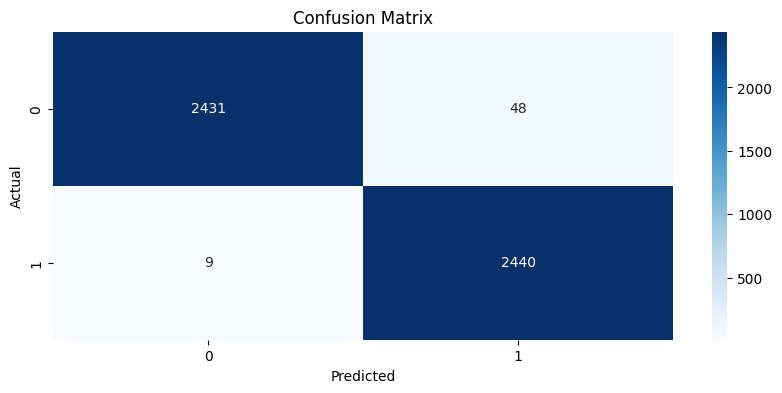

In [76]:
# Visualize the confusion matrix
plt.figure(figsize=(10,4))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

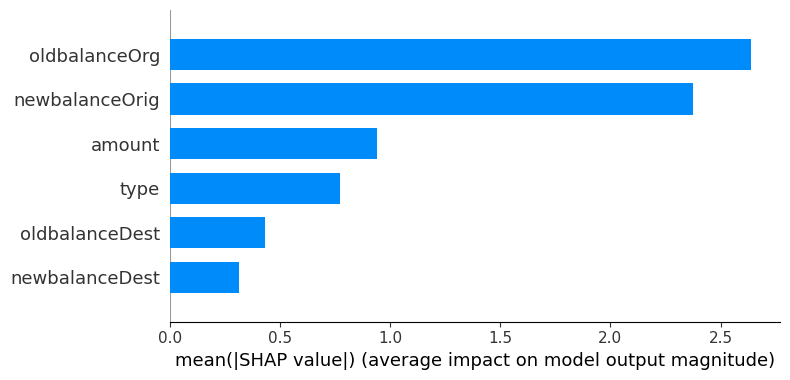

In [77]:

import shap
import numpy as np
shap.initjs()

# Reduce dataset size to 5%
X_train_sample = X_train_under.sample(frac=0.05, random_state=42)
X_test_sample = X_test_under.sample(frac=0.05, random_state=42)

explainer = shap.TreeExplainer(gb, X_train_sample)

# Calculate SHAP values for the reduced testing data
shap_values = explainer.shap_values(X_test_sample)

# Plot the SHAP summary plot (for an overview of feature importances)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")


In [78]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test_sample.iloc[0])


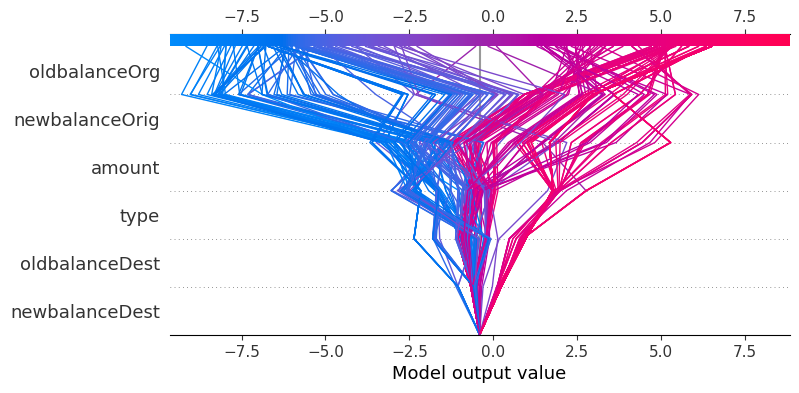

In [79]:
shap.decision_plot(explainer.expected_value, shap_values, X_test_under.columns, ignore_warnings=True)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,classification_report
gb = GradientBoostingClassifier()
#fitting to the model
gb.fit(X_train_under,y_train_under)
#predicton
gb_pred = gb.predict(X_train_under)
#accuracy score 
gb_acc = accuracy_score(y_train_under,gb_pred)
print("Accuracy Score of GradientBoostingClassifier = ",gb_acc)
print('='*70)
#finding the f1 score
gb_f1 = f1_score(y_train_under,gb_pred)
print("f1 score score fo GradientBoostingClassifier =",gb_f1)
print('='*70)
#precision_score
gb_pre = precision_score(y_train_under,gb_pred)
print('precision_score of GradientBoostingClassifier is=',gb_pre)
print('='*70)
#recall_score
gb_rec = recall_score(y_train_under,gb_pred)
print('recall_score of GradientBoostingClassifier is =',gb_rec)
print('='*70)
#confusion matrix
gb_cm = confusion_matrix(y_train_under, gb_pred) 
print('coonfusion matrix of GradientBoostingClassifier =\n',gb_cm)
print('='*70)
## classification report 
gb_cr = classification_report(y_train_under, gb_pred)
print('classification_report of GradientBoostingClassifier =\n',gb_cr)


Accuracy Score of GradientBoostingClassifier =  0.9907810053922421
f1 score score fo GradientBoostingClassifier = 0.990855762594893
precision_score of GradientBoostingClassifier is= 0.9854152367879204
recall_score of GradientBoostingClassifier is = 0.9963566967383761
coonfusion matrix of GradientBoostingClassifier =
 [[5649   85]
 [  21 5743]]
classification_report of GradientBoostingClassifier =
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5734
           1       0.99      1.00      0.99      5764

    accuracy                           0.99     11498
   macro avg       0.99      0.99      0.99     11498
weighted avg       0.99      0.99      0.99     11498



## Model comparison for Proposed system

### Plot for  accuracies,precision,recallf1_scores comprison

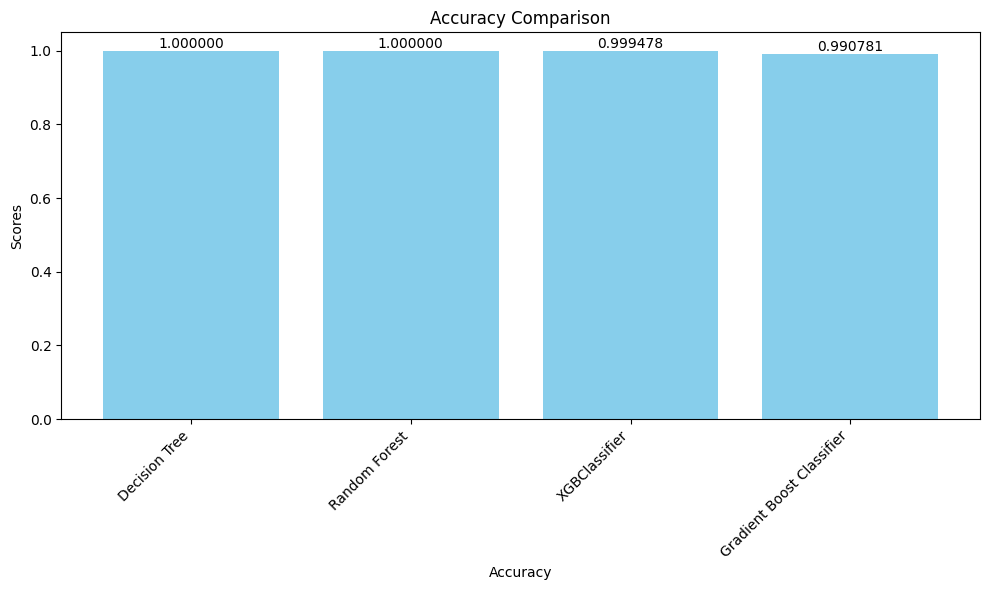

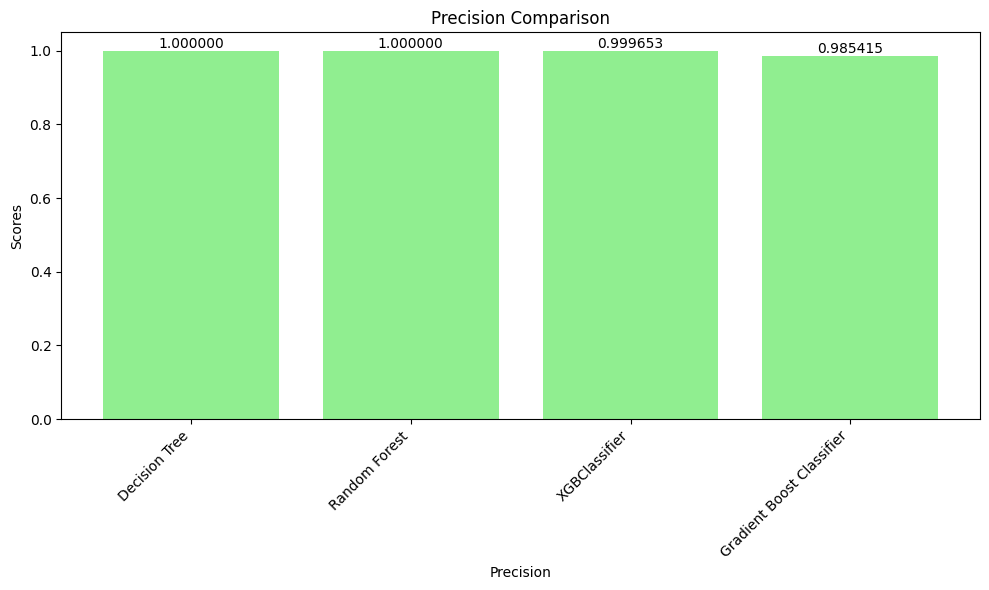

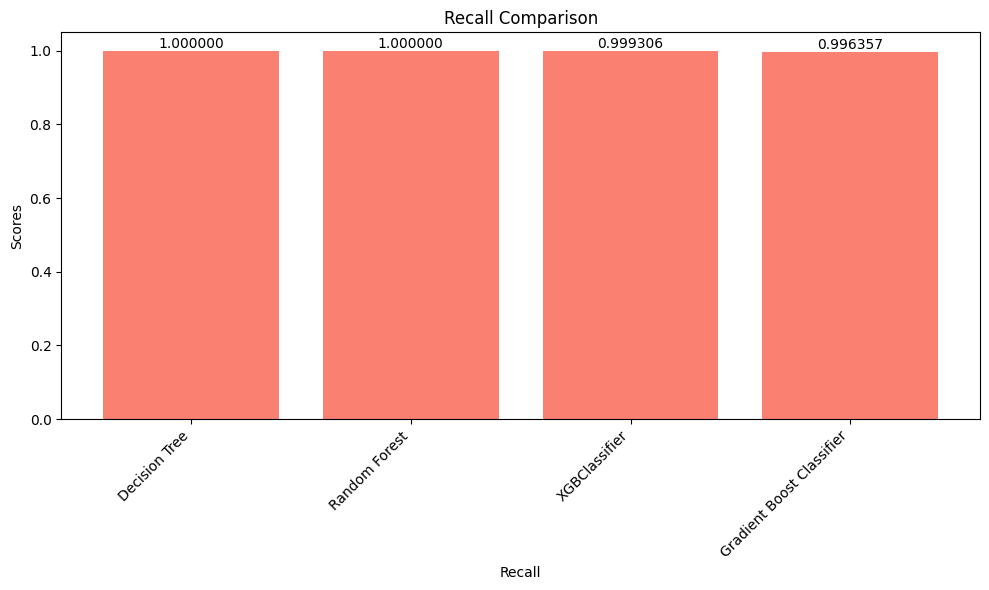

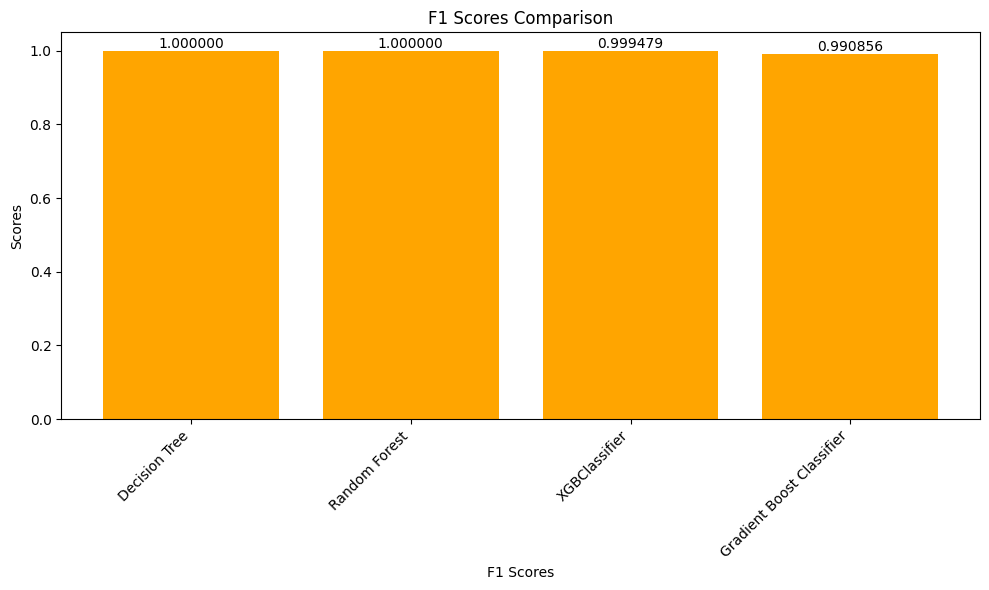

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison plots
models = ['Decision Tree', 'Random Forest', 'XGBClassifier', 'Gradient Boost Classifier']
accuracies = [dt_accuracy, rf_acc, xgb_acc, gb_acc]
precision = [dt_precision_score, rf_pre, xgb_pre, gb_pre]
recall = [dt_recall_score, rf_rec, xgb_rec, gb_rec]
f1_scores = [dt_f1_score, rf_f1, xgb_f1, gb_f1]

def comparison_plot(name, color, values):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, values, color=color)
    plt.xlabel(name)
    plt.ylabel('Scores')
    plt.title(f'{name} Comparison')
    plt.xticks(rotation=45, ha='right')
    
    # Adding text annotations
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.6f}',
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

comparison_plot(name="Accuracy", color="Skyblue", values=accuracies)
comparison_plot(name="Precision", color="lightgreen", values=precision)
comparison_plot(name="Recall", color="salmon", values=recall)
comparison_plot(name="F1 Scores", color="orange", values=f1_scores)


#### ROC curve
The ROC (Receiver Operating Characteristic) curve is a graphical representation used to evaluate the performance of a binary classification model. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.

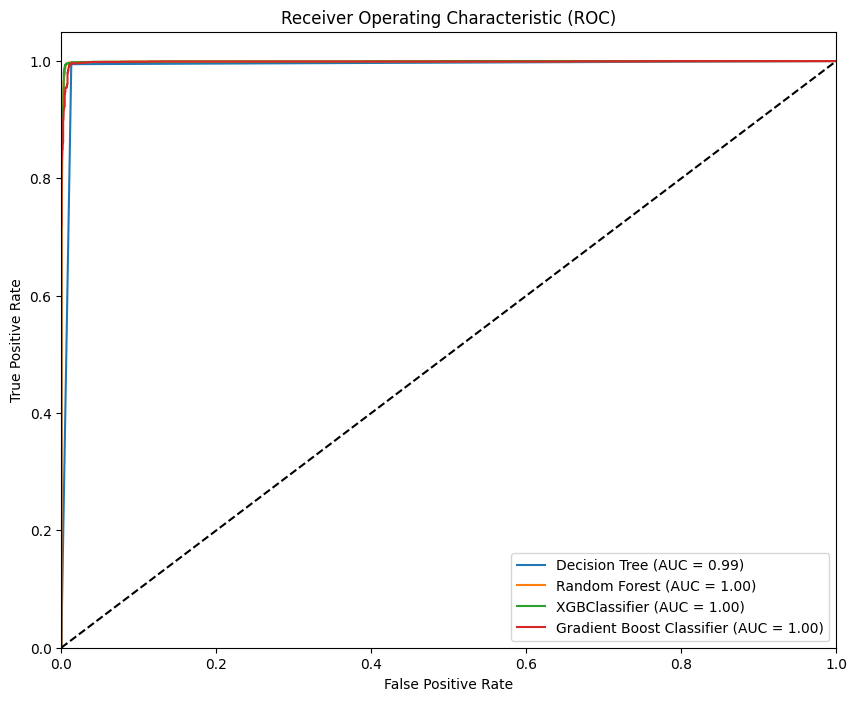

In [82]:
# Initialize models
from sklearn.metrics import auc,roc_auc_score,roc_curve
models = {
    'Decision Tree': dt,
    'Random Forest': grid_rf_clf,
    'XGBClassifier': xgb,
    'Gradient Boost Classifier': gb
}


# Plot ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Predict probabilities
    y_prob = model.predict_proba(X_test_under)[:, 1]
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_under, y_prob)
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


## Model Saving

In [ ]:
# Save the best models

import joblib

joblib.dump(grid_rf_clf, 'random_forest_model.joblib')
joblib.dump(dt, 'decision_tree_model.joblib')
joblib.dump(xgb, 'Xgboost.joblib')
joblib.dump(gb, 'gredintboost.joblib')


['gredintboost.joblib']

#

### Model Prediction

In [ ]:
import joblib

# # Load the scaler
# scaler = joblib.load(r"scaler.pkl")

# Load the Model
model = joblib.load(r"gredintboost.joblib")

classes = {0 : "No Fraud Transaction", 1 : "Fraud Transaction"}

def prediction_function(inputs):
    # scaled_features = scaler.transform(inputs)
    prediction = model.predict(inputs)
    result = classes[prediction[0]]
    print("Predicted result: ", result)

In [ ]:
inputs = [[3, 7817.71, 53860, 46042.29, 0, 0]]
prediction_function(inputs)

Predicted result:  No Fraud Transaction


In [ ]:
inputs = [[0.6133541393575054,
  -0.43912606418938016,
  -0.28281622352355557,
  -0.08378207860094632,
  -0.2385639187052851,
  -0.3262415739592275]]
prediction_function(inputs)

Predicted result:  Fraud Transaction


In [ ]:

inputs = [[-0.7383538 , -0.43254419, -0.37617053, -0.20990014, -0.16264522,
        -0.2528175 ]]
prediction_function(inputs)

Predicted result:  Fraud Transaction


In [ ]:
X_train_under

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
4735519,3,6986.06,322904.18,315918.12,0.00,0.00
1931271,1,19244.90,19244.90,0.00,264512.88,283757.78
2792358,1,332151.67,332151.67,0.00,0.00,332151.67
6112212,1,210525.95,210525.95,0.00,461327.69,671853.64
6273112,4,17484.29,17484.29,0.00,0.00,0.00
...,...,...,...,...,...,...
3611349,4,159106.12,159106.12,0.00,0.00,0.00
4782248,4,170038.31,170038.31,0.00,0.00,0.00
433961,1,8369.07,23265.00,14895.93,70063.42,78432.50
3215772,0,262120.50,8127067.18,8389187.68,407941.21,145820.71


In [ ]:
y_test_under.to_csv('test.csv')

In [ ]:
X_train_under.to_csv('train.csv')